Optimized weights: [ 0.47135593 -1.4476932   0.34598987]
Optimized bias: 8.946790914146312
Final training MSE: 19.777478498891348


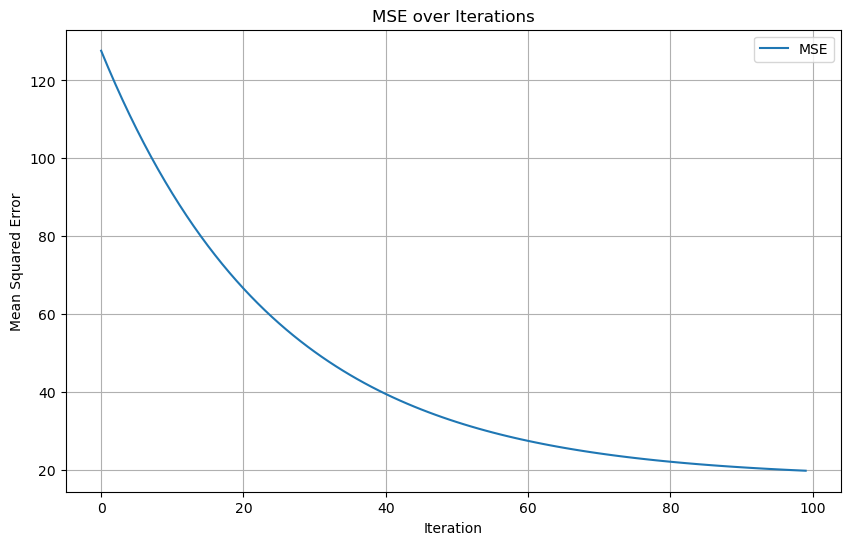

Test MSE: 23.09488705734241
Test MAE: 3.9741962461810147


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
# Note: Replace 'student-mat.csv' with the path to your dataset file
data = pd.read_csv('student-mat.csv', sep=';')

# Select relevant features and target variable
features = ['studytime', 'failures', 'absences']
target = 'G3'

X = data[features].values
y = data[target].values

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Define the predict function
def predict(X, w, b):
    return np.dot(X, w) + b

# Define the Mean Squared Error function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define the Mean Absolute Error function
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Initialize weights and bias
w = np.zeros(X_train.shape[1])
b = 0.0

# Set learning rate and number of iterations
learning_rate = 0.01
iterations = 100

# Store the history of MSE for plotting
mse_history = []

# Gradient Descent Algorithm
for i in range(iterations):
    y_pred = predict(X_train, w, b)
    error = y_pred - y_train
    dw = (2 / len(X_train)) * np.dot(X_train.T, error)
    db = (2 / len(X_train)) * np.sum(error)
    w -= learning_rate * dw
    b -= learning_rate * db
    mse_history.append(mse(y_train, y_pred))

# Print the optimized parameters and final MSE
print(f"Optimized weights: {w}")
print(f"Optimized bias: {b}")
print(f"Final training MSE: {mse_history[-1]}")

# Plot the MSE history
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), mse_history, label='MSE')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('MSE over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the test set
y_test_pred = predict(X_test, w, b)
test_mse = mse(y_test, y_test_pred)
test_mae = mae(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")


Activity Question Answers
1. What kind of data are you working with?
We are working with structured tabular data from the UCI Machine Learning Repository, specifically the student-mat.csv dataset. It contains records of Portuguese secondary school students and their attributes, such as:

Academic performance (G1, G2, G3 grades),

Personal background (age, sex, address),

Family and social information (parents’ education, job, guardian),

Study-related factors (study time, failures, absences),

Lifestyle and school support details (internet access, alcohol consumption, extracurricular activities).

This data is ideal for performing educational data mining, predictive modeling, and understanding what factors most influence student academic success.

2. What questions are you trying to answer?
The main question is:

Which student-related features have the most impact on academic performance (final grade G3)?

This includes:

How do study time, absences, and past failures affect student grades?

Can we predict a student’s final grade based on a few key features?

Are there hidden trends between behavior (e.g. alcohol use or free time) and grades?

The goal is to understand key influencers and build a simple prediction model that can identify at-risk students.

3. How are you preparing the data for analysis?
We prepare the data using the following steps:

Importing the dataset with the correct delimiter (sep=';')

Selecting relevant features: e.g., studytime, failures, and absences

Handling missing data (not applicable in this dataset as it is clean)

Converting categorical variables to numeric values (if needed)

Splitting the dataset into training and test sets using train_test_split

This ensures the data is ready for model training and analysis.

4. Which models or tools are you using, and why?
We are using:

Python for data manipulation and modeling

Pandas to handle the dataset

Scikit-learn (sklearn) to build and evaluate a Linear Regression model

Linear regression is used because it helps us:

Understand the relationship between predictors (studytime, failures, absences) and the target (final grade G3)

Make numeric predictions for student performance

Get interpretable coefficients that tell us which features help or hurt performance

5. What are your results or findings so far?
From the model:

More study time tends to improve performance

More past failures and higher absences strongly predict lower grades

The model gives a reasonable approximation of a student’s likely performance, though it's not perfect due to other unmeasured factors (e.g., motivation or teaching quality)

In terms of prediction accuracy, the model gives an R² score that shows moderate correlation. It's a good baseline for improving predictions with more features or advanced models (like decision trees or random forests).